In [1]:
import pandas as pd

In [2]:
csv = 'data_update.csv'
data = pd.read_csv(csv, delimiter=";")
df = pd.DataFrame(data)
print(df)

      id          nama        warna bentuk kristal
0      4    ncd.11.jpg   hijau muda   cair   tidak
1      5    ncd.12.jpg   hijau muda   cair   tidak
2      6    ncd.14.jpg   hijau muda   cair   tidak
3      7    ncd.21.jpg   hijau muda   cair   tidak
4      8    ncd.22.jpg   hijau muda   cair   tidak
..   ...           ...          ...    ...     ...
292  296  cocci.72.jpg  coklat muda   cair   tidak
293  297  cocci.73.jpg  coklat muda   cair   tidak
294  298  cocci.74.jpg  coklat muda   cair   tidak
295  299  cocci.75.jpg  coklat muda   cair   tidak
296  300  cocci.76.jpg  coklat muda   cair   tidak

[297 rows x 5 columns]


In [3]:
duplikat_nama = df[df.duplicated(['nama'])]
print('Duplikat berdasarkan nama:')
print(duplikat_nama)

Duplikat berdasarkan nama:
    id        nama       warna bentuk kristal
18  22  ncd.68.jpg  hijau muda   cair   tidak
24  28  ncd.86.jpg  hijau muda   cair   tidak


In [4]:
# df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['nama'], inplace=True)
# df[df['nama'] == "ncd.86.jpg"]

In [5]:
df.count()

id         295
nama       295
warna      295
bentuk     295
kristal    295
dtype: int64

In [6]:
df = df.assign(penyakit=df['nama'].str.split(".").str.get(0))
df

,id,nama,warna,bentuk,kristal,penyakit
0,4,ncd.11.jpg,hijau muda,cair,tidak,ncd
1,5,ncd.12.jpg,hijau muda,cair,tidak,ncd
2,6,ncd.14.jpg,hijau muda,cair,tidak,ncd
3,7,ncd.21.jpg,hijau muda,cair,tidak,ncd
4,8,ncd.22.jpg,hijau muda,cair,tidak,ncd
...,...,...,...,...,...,...
292,296,cocci.72.jpg,coklat muda,cair,tidak,cocci
293,297,cocci.73.jpg,coklat muda,cair,tidak,cocci
294,298,cocci.74.jpg,coklat muda,cair,tidak,cocci
295,299,cocci.75.jpg,coklat muda,cair,tidak,cocci


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [8]:
df['warna_encode'] = label_encoder.fit_transform(df['warna'])
df['bentuk_encode'] = label_encoder.fit_transform(df['bentuk'])
df['kristal_encode'] = label_encoder.fit_transform(df['kristal'])
df['penyakit_encode'] = label_encoder.fit_transform(df['penyakit'])
df

,id,nama,warna,bentuk,kristal,penyakit,warna_encode,bentuk_encode,kristal_encode,penyakit_encode
0,4,ncd.11.jpg,hijau muda,cair,tidak,ncd,2,0,0,2
1,5,ncd.12.jpg,hijau muda,cair,tidak,ncd,2,0,0,2
2,6,ncd.14.jpg,hijau muda,cair,tidak,ncd,2,0,0,2
3,7,ncd.21.jpg,hijau muda,cair,tidak,ncd,2,0,0,2
4,8,ncd.22.jpg,hijau muda,cair,tidak,ncd,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...
292,296,cocci.72.jpg,coklat muda,cair,tidak,cocci,0,0,0,0
293,297,cocci.73.jpg,coklat muda,cair,tidak,cocci,0,0,0,0
294,298,cocci.74.jpg,coklat muda,cair,tidak,cocci,0,0,0,0
295,299,cocci.75.jpg,coklat muda,cair,tidak,cocci,0,0,0,0


In [9]:
df = df.drop(['id','warna','bentuk','kristal','penyakit'], axis=1)
df

,nama,warna_encode,bentuk_encode,kristal_encode,penyakit_encode
0,ncd.11.jpg,2,0,0,2
1,ncd.12.jpg,2,0,0,2
2,ncd.14.jpg,2,0,0,2
3,ncd.21.jpg,2,0,0,2
4,ncd.22.jpg,2,0,0,2
...,...,...,...,...,...
292,cocci.72.jpg,0,0,0,0
293,cocci.73.jpg,0,0,0,0
294,cocci.74.jpg,0,0,0,0
295,cocci.75.jpg,0,0,0,0


In [10]:
import pandas as pd


X = df.copy()
X.pop('nama')
y = X.pop('penyakit_encode')

In [11]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state = 0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion="entropy", 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features="log2", 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0
)

In [13]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [14]:
predictions = clf.predict(X_test)
print(predictions)

[0 0 2 1 0 2 0 2 1 2 0 1 3 0 2 0 0 0 2 3 2 0 2 1 0 1 3 0 0 1 2 1 3 1 3 1 2
 3 3 3 0 3 1 2 2 1 3 0 3 3 1 0 2 0 3 1 0 1 0]


In [15]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, predictions))
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, recall_score

cm = confusion_matrix(y_test, predictions)
recall= recall_score(y_test,predictions,pos_label='positive',average='micro')
f1= f1_score(y_test,predictions,pos_label='positive',average='micro')
ac = accuracy_score(y_test,predictions)
print("Confussion Matrix: ",cm)
print("recall: ",recall)
print("f1: ",f1)
print("Accuration: ",ac)

Confussion Matrix:  [[19  0  0  0]
 [ 0 13  0  0]
 [ 0  1 13  0]
 [ 0  0  0 13]]
recall:  0.9830508474576272
f1:  0.9830508474576272
Accuration:  0.9830508474576272


C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10)

array([1.        , 0.93333333, 0.96666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [19]:
import numpy as np
X_new = np.array(kelas3)
# X_new = sc.fit_transform(X_new)
# Lakukan prediksi menggunakan model KNN
y_pred = clf.predict(X_new)

# Tampilkan hasil prediksi
print("Hasil prediksi: ", y_pred)

Hasil prediksi:  [3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3]


C:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [20]:
target = np.unique(y.values)
target = target.astype(np.str)

C:\Users\acer\AppData\Local\Temp\ipykernel_14120\2859762235.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = target.astype(np.str)


[Text(0.5909090909090909, 0.9, 'kristal_encode <= 0.5\nentropy = 1.999\nsamples = 236\nvalue = [57, 57, 59, 63]\nclass = 3'),
 Text(0.36363636363636365, 0.7, 'bentuk_encode <= 0.5\nentropy = 1.597\nsamples = 137\nvalue = [57, 15, 59, 6]\nclass = 2'),
 Text(0.18181818181818182, 0.5, 'warna_encode <= 1.0\nentropy = 1.144\nsamples = 119\nvalue = [57, 0, 59, 3]\nclass = 2'),
 Text(0.09090909090909091, 0.3, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0, 0, 0]\nclass = 0'),
 Text(0.2727272727272727, 0.3, 'warna_encode <= 2.5\nentropy = 0.28\nsamples = 62\nvalue = [0, 0, 59, 3]\nclass = 2'),
 Text(0.18181818181818182, 0.1, 'entropy = 0.0\nsamples = 59\nvalue = [0, 0, 59, 0]\nclass = 2'),
 Text(0.36363636363636365, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]\nclass = 3'),
 Text(0.5454545454545454, 0.5, 'warna_encode <= 2.0\nentropy = 0.65\nsamples = 18\nvalue = [0, 15, 0, 3]\nclass = 1'),
 Text(0.45454545454545453, 0.3, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0]\nclass = 1')

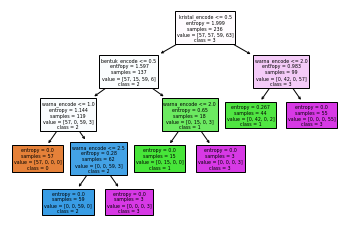

In [21]:
from sklearn import tree
tree.plot_tree(clf, feature_names = X.columns.tolist(),
              class_names = target, filled = True)

In [18]:
# 1
kelas1 = [[1,1,0],
[1,1,0],
[1,1,1],
[1,1,0],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,0],
[1,1,1],
[2,1,1],
[1,1,1],
[2,1,0],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1],
[1,1,1]]

# 3
kelas3 = [[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[1,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[1,1,1],
[3,1,1],
[3,1,1],
[3,1,1],
[3,1,0],
[3,1,1],
[3,0,0],
[3,1,1],
[3,1,1],
[3,1,1]]

# 2
kelas2 = [[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[3,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,1,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0],
[2,0,0]]

# 0
kelas0 = [[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0],
[0,0,0]
]

In [22]:
# from joblib import dump
# dump(clf, 'decision.joblib')
# import pickle

# # Simpan model KNN ke dalam file 'decision.pkl'
# with open('decision.pkl', 'wb') as f:
#     pickle.dump(clf, f)